# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [61]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [63]:
# Combine the data into a single DataFrame
merge_study_metadata = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_study_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Checking the number of mice.
total_mice = merge_study_metadata["Mouse ID"].nunique()
total_mice

249

In [67]:
merge_study_metadata.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [69]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merge_study_metadata[merge_study_metadata.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [71]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mask = merge_study_metadata['Mouse ID'] == 'g989'
clean_merge_study_metadata = merge_study_metadata.drop(merge_study_metadata[duplicate_mask].index)
clean_merge_study_metadata.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [75]:
# Checking the number of mice in the clean DataFrame.
total_mice_new = clean_merge_study_metadata["Mouse ID"].nunique()
total_mice_new

248

In [77]:
clean_merge_study_metadata.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = clean_merge_study_metadata.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary_statistics

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [82]:
#Variance and SEM are added
variance = clean_merge_study_metadata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sample_std = clean_merge_study_metadata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sample_size = clean_merge_study_metadata.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
SEM = sample_std / np.sqrt(sample_size)
summary_statistics['Variance'] = variance
summary_statistics['SEM'] = SEM
summary_statistics

,count,mean,std,min,25%,50%,75%,max,Variance,SEM
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,24.947764,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,39.290177,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,43.128684,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,68.553577,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,66.173479,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,61.168083,0.581331
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421,43.852013,0.544332
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,23.486704,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,59.450562,0.573111


## Bar and Pie Charts

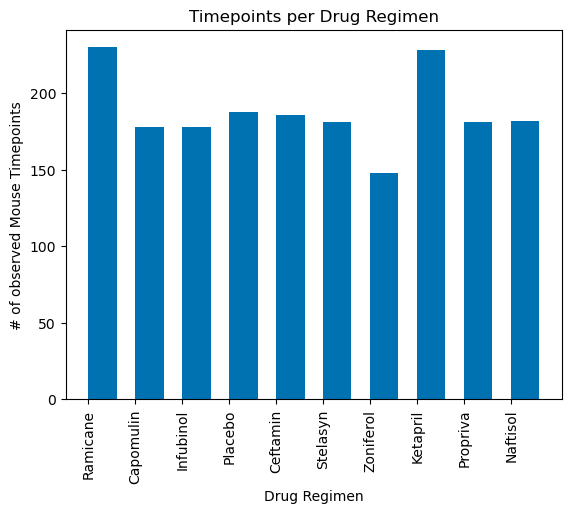

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_merge_study_metadata['Drug Regimen'].unique()
total_drug_tpoints = clean_merge_study_metadata.groupby('Drug Regimen')['Timepoint'].count().tolist()
plt.bar(x_axis, total_drug_tpoints, color = '#0072B2', alpha=1, align="edge", width=0.6)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.title('Timepoints per Drug Regimen')
plt.xticks(rotation=90)
plt.show()

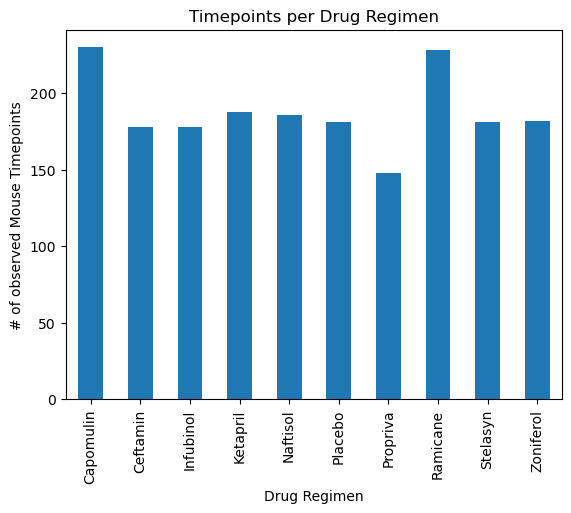

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Sec_total_drug_tpoints = clean_merge_study_metadata.groupby('Drug Regimen')['Timepoint'].count()
bar = Sec_total_drug_tpoints.plot(kind='bar')
bar.set_xlabel('Drug Regimen')
bar.set_ylabel('# of observed Mouse Timepoints')
bar.set_title('Timepoints per Drug Regimen')
plt.show()

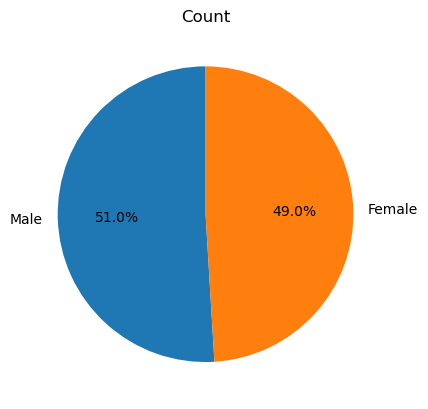

In [89]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
male = clean_merge_study_metadata['Sex'].value_counts()['Male']
female = clean_merge_study_metadata['Sex'].value_counts()['Female']
data_pie = [male, female]
labels = ['Male', 'Female']
plt.pie(data_pie, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Count')
plt.show()

<Axes: ylabel='count'>

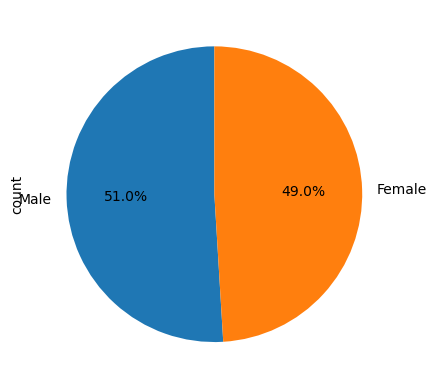

In [91]:
sex_count= clean_merge_study_metadata['Sex'].value_counts()
sex_count.plot(kind='pie', labels=sex_count.index, autopct='%1.1f%%', startangle=90)

## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_volume = clean_merge_study_metadata[(clean_merge_study_metadata['Timepoint'] == 45) & 
(clean_merge_study_metadata['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']))].groupby('Mouse ID')['Timepoint'].max()
df_final_volume = pd.DataFrame(final_volume).reset_index()
df_final_volume.set_index('Mouse ID', inplace=True)
df_final_volume

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [96]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_final_volume = pd.merge(clean_merge_study_metadata, df_final_volume, on='Mouse ID')
merge_final_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
625,z581,Infubinol,Female,24,25,25,54.316407,2,45
626,z581,Infubinol,Female,24,25,30,56.286750,2,45
627,z581,Infubinol,Female,24,25,35,58.628399,3,45
628,z581,Infubinol,Female,24,25,40,60.053740,3,45


In [151]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []
for name in treatment_names:
    treatment_data = merge_final_volume[merge_final_volume['Drug Regimen'] == name]['Tumor Volume (mm3)']
    final_volume_data = merge_final_volume.loc[merge_final_volume.index.isin(merge_final_volume.groupby('Mouse ID')['Timepoint_x'].idxmax()),'Tumor Volume (mm3)']
    tumor_volume_data.append(final_volume_data.tolist())
    Q1 = np.percentile(final_volume_data, 25)
    Q3 = np.percentile(final_volume_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    outliers = final_volume_data[(final_volume_data<lower_bound)| (final_volume_data>upper_bound)]
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)
print('Outliers', outliers)

Lower Bound: -9.513252184999999
Upper Bound: 105.135493215
Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


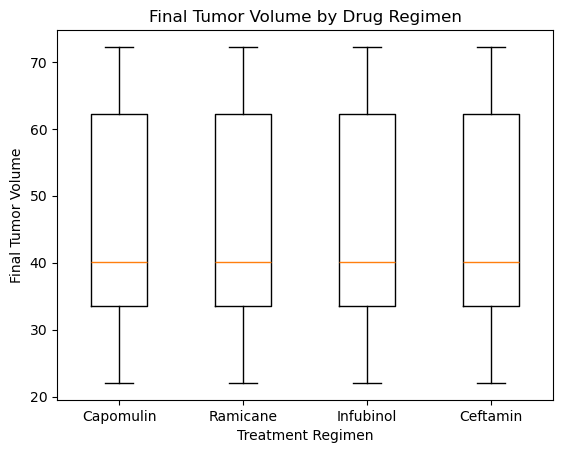

In [153]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volume_data.sort()
plt.boxplot(tumor_volume_data, labels=treatment_names, flierprops=dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none'))
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume')
plt.title('Final Tumor Volume by Drug Regimen')
plt.show()

## Line and Scatter Plots

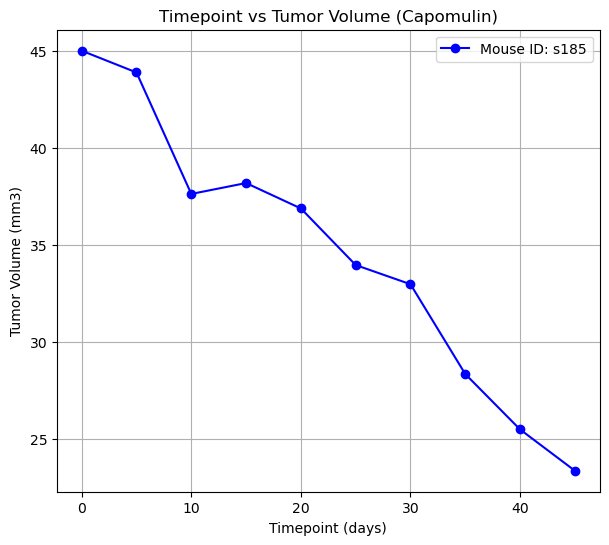

In [135]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
regimen_capomulin = clean_merge_study_metadata[clean_merge_study_metadata['Drug Regimen'] == 'Capomulin']
first_capomulin_value = regimen_capomulin.iloc[1, regimen_capomulin.columns.get_loc('Mouse ID')]
line_plot_data = clean_merge_study_metadata[clean_merge_study_metadata['Mouse ID'] == first_capomulin_value]
plt.figure(figsize=(7, 6)) 
plt.plot(line_plot_data['Timepoint'], line_plot_data['Tumor Volume (mm3)'], marker='o', color='b', label='Mouse ID: ' + first_capomulin_value)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Timepoint vs Tumor Volume (Capomulin)')
plt.legend()
plt.grid(True)
plt.show()

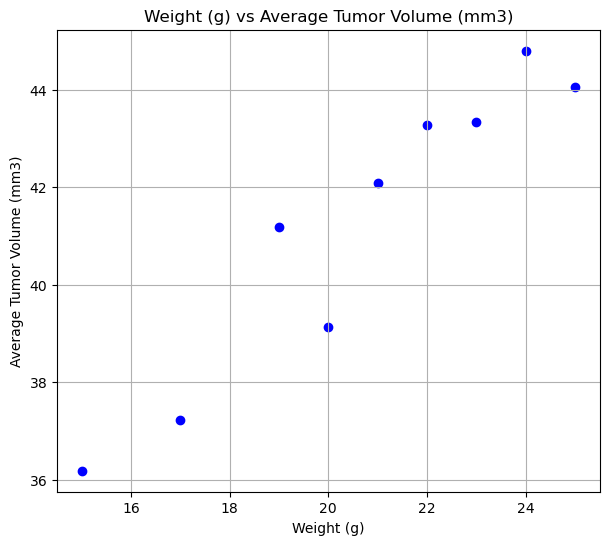

In [137]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_weight = regimen_capomulin.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()
plt.figure(figsize=(7, 6)) 
plt.scatter(average_tumor_weight['Weight (g)'], average_tumor_weight['Tumor Volume (mm3)'], marker='o', color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight (g) vs Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [139]:
weights = average_tumor_weight['Weight (g)'].nunique()
weights

9

## Correlation and Regression

In [142]:
#Correlation coefficient
correlation, p_value = pearsonr(average_tumor_weight['Weight (g)'], average_tumor_weight['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation)
print("P Value:", p_value)

Correlation Coefficient: 0.9505243961855268
P Value: 8.449451040646362e-05


In [144]:
# Calculate linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slop, pe_int, pe_r, pe_p, pe_std_err = st.linregress(average_tumor_weight['Weight (g)'], average_tumor_weight['Tumor Volume (mm3)'])
pe_fit = pe_slop * average_tumor_weight['Weight (g)'] + pe_int

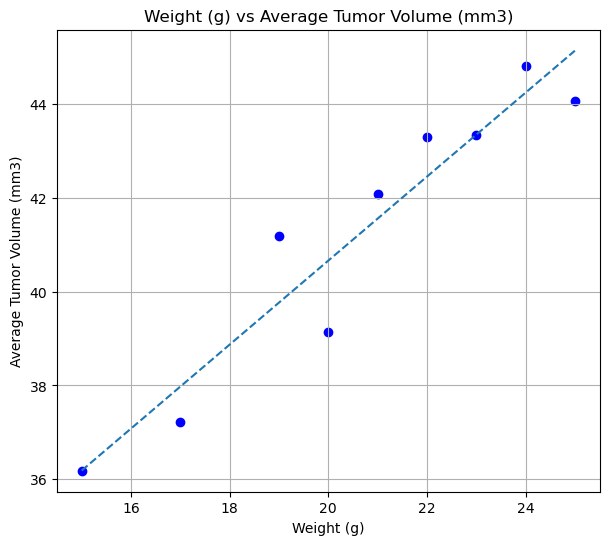

In [146]:
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(7, 6)) 
plt.scatter(average_tumor_weight['Weight (g)'], average_tumor_weight['Tumor Volume (mm3)'], marker='o', color='b')
plt.plot(average_tumor_weight['Weight (g)'], pe_fit, "--")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight (g) vs Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()